In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install opencv-python==4.6.0.66


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import os
import glob
from xml.etree import ElementTree

In [4]:
input_data_path = './facemaskdetection/images'
annotations_path = "./facemaskdetection/annotations"
output_data_path = '.'

In [5]:
annotations_files = !ls './annotations'
images_files = !ls './images'

len(annotations_files), len(images_files)


(1, 1)

In [6]:
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}

for annotation in glob.glob(annotations_path + '/*.xml'):
    tree = ElementTree.parse(annotation)
    
    for element in tree.iter():
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag: 
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))    

        if 'object' in element.tag:
            for attribute in list(element):
                
                if 'name' in attribute.tag:
                    name = attribute.text                 
                    information['label'] += [name]
                    information['width'] += [width]
                    information['height'] += [height] 
                    information['file'] += [annotation.split('/')[-1][0:-4]] 
                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            information['ymin'] += [ymin]                                
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            information['xmax'] += [xmax]                                
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            information['ymax'] += [ymax]

In [7]:
df = pd.DataFrame(information)
df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,62,194,160,320,without_mask,maksssksksss299,301,400
1,43,169,149,308,without_mask,maksssksksss528,301,400
2,48,107,218,304,mask_weared_incorrect,maksssksksss272,275,400
3,28,78,43,99,with_mask,maksssksksss514,400,267
4,160,66,176,83,with_mask,maksssksksss514,400,267
5,174,33,186,52,with_mask,maksssksksss514,400,267
6,202,40,216,59,with_mask,maksssksksss514,400,267
7,237,41,248,58,without_mask,maksssksksss514,400,267
8,249,44,266,66,mask_weared_incorrect,maksssksksss514,400,267
9,298,38,311,54,with_mask,maksssksksss514,400,267


In [8]:
df['annotation_file'] = df['file'] + '.xml'
df['image_file'] = df['file'] + '.png'

In [9]:
df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,62,194,160,320,without_mask,maksssksksss299,301,400,maksssksksss299.xml,maksssksksss299.png
1,43,169,149,308,without_mask,maksssksksss528,301,400,maksssksksss528.xml,maksssksksss528.png
2,48,107,218,304,mask_weared_incorrect,maksssksksss272,275,400,maksssksksss272.xml,maksssksksss272.png
3,28,78,43,99,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
4,160,66,176,83,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png


In [10]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

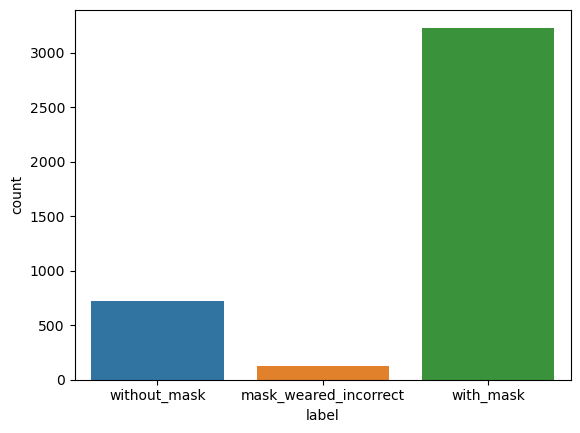

In [11]:
sns.countplot(x = df["label"])

In [12]:
df["label"].value_counts()

label
with_mask                3232
without_mask              717
mask_weared_incorrect     123
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt

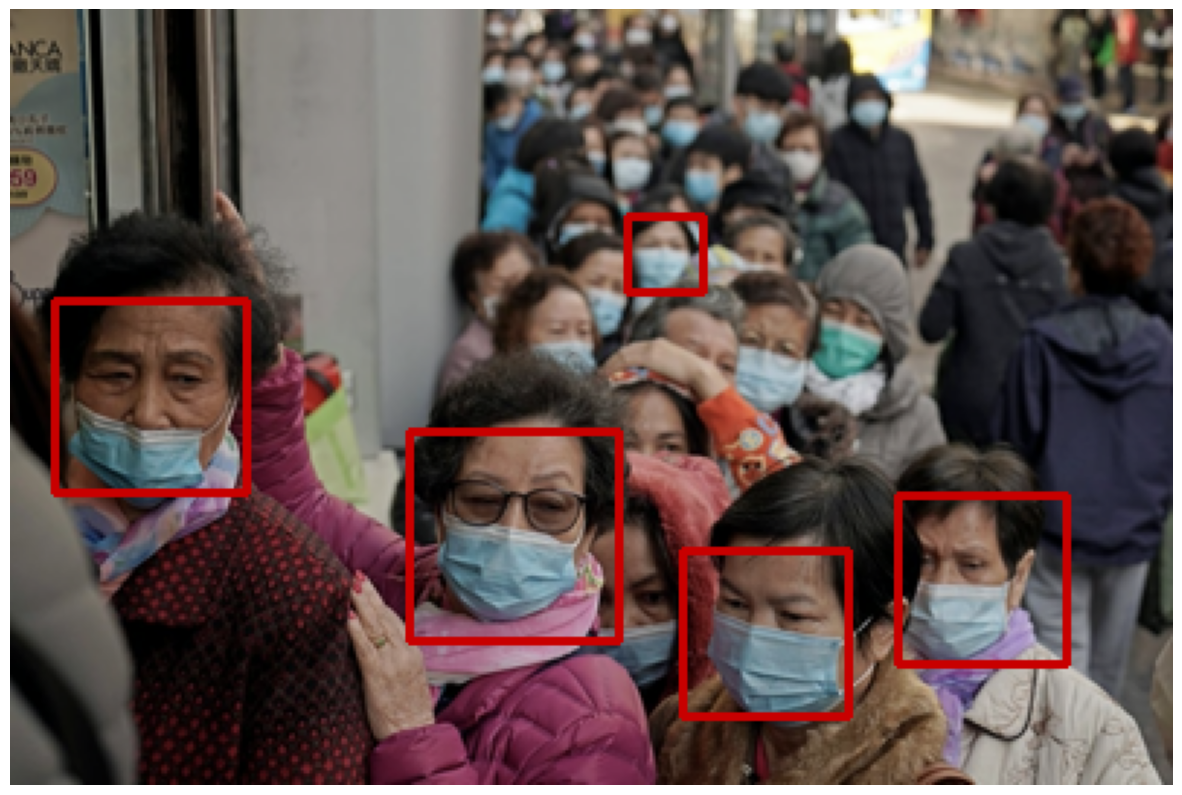

In [14]:

# Yüz tespiti için önceden eğitilmiş modeli yükleme
face_model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Görüntüyü dizinden okuma
img = cv2.imread("./facemaskdetection/images/maksssksksss11.png")

# Görüntüyü gri tonlamaya dönüştürme
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Görüntüdeki yüzleri tespit etme
detected_faces = face_model.detectMultiScale(gray_img)

# Yüzlerin etrafına dikdörtgen çizme
for (x, y, w, h) in detected_faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 200), 2)

# Görüntüyü görüntüleme
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [15]:
def render_image(image):
    plt.figure(figsize = (12, 8))
    plt.imshow(image)
    plt.show()

def convert_to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [16]:
df['image_file'].iloc[0]

'maksssksksss299.png'

In [17]:
image_299_path = './facemaskdetection/images/' + df['image_file'].iloc[0]
image_299_path

'./facemaskdetection/images/maksssksksss299.png'

In [18]:
image_299 = cv2.imread(image_299_path)
image_299

array([[[140, 151, 143],
        [143, 150, 146],
        [139, 145, 143],
        ...,
        [149, 166, 164],
        [150, 166, 166],
        [151, 168, 168]],

       [[142, 154, 145],
        [141, 148, 144],
        [141, 147, 145],
        ...,
        [151, 167, 166],
        [150, 168, 166],
        [151, 168, 168]],

       [[143, 151, 145],
        [141, 147, 143],
        [142, 147, 145],
        ...,
        [151, 168, 167],
        [152, 169, 169],
        [155, 170, 170]],

       ...,

       [[ 62,  53,  43],
        [ 72,  60,  52],
        [ 78,  67,  59],
        ...,
        [ 26,  27,  19],
        [ 24,  26,  17],
        [ 23,  25,  17]],

       [[ 51,  45,  44],
        [ 51,  42,  43],
        [ 53,  44,  43],
        ...,
        [ 27,  29,  20],
        [ 27,  28,  19],
        [ 27,  29,  19]],

       [[ 47,  39,  37],
        [ 47,  40,  38],
        [ 48,  43,  39],
        ...,
        [ 27,  29,  19],
        [ 19,  23,  13],
        [ 12,  15,   8]]

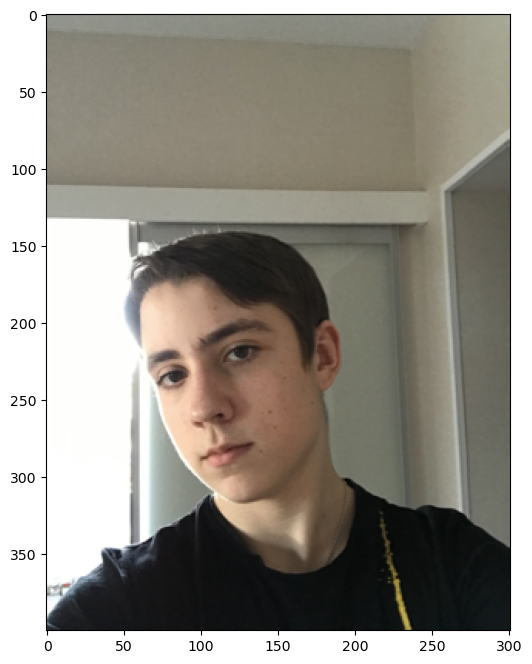

In [19]:
# Display The Image in RGB
render_image(convert_to_RGB(image_299))

In [20]:
annotation_299_path = './facemaskdetection/annotations/' + df['annotation_file'].iloc[0]
annotation_299_path

'./facemaskdetection/annotations/maksssksksss299.xml'

In [21]:
# Shape of Image 299
image_299.shape

(400, 301, 3)

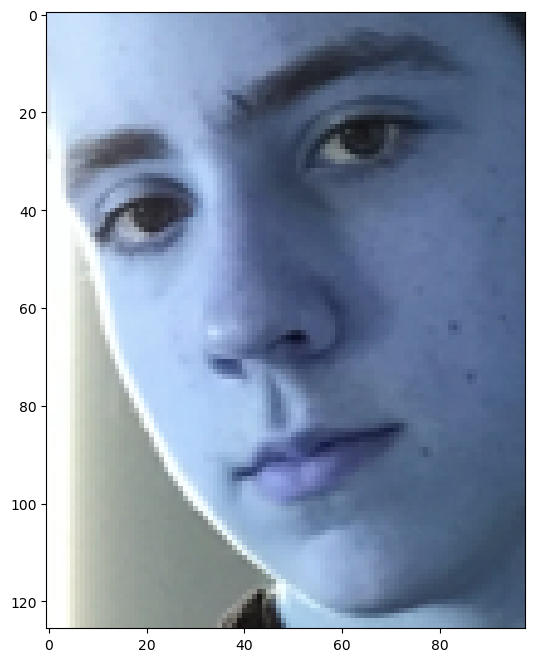

In [22]:
x = df['xmin'].iloc[0]
y = df['ymin'].iloc[0]
width = df['xmax'].iloc[0]
height = df['ymax'].iloc[0]

cropped_299 = image_299[y:height, x:width]
render_image(cropped_299)

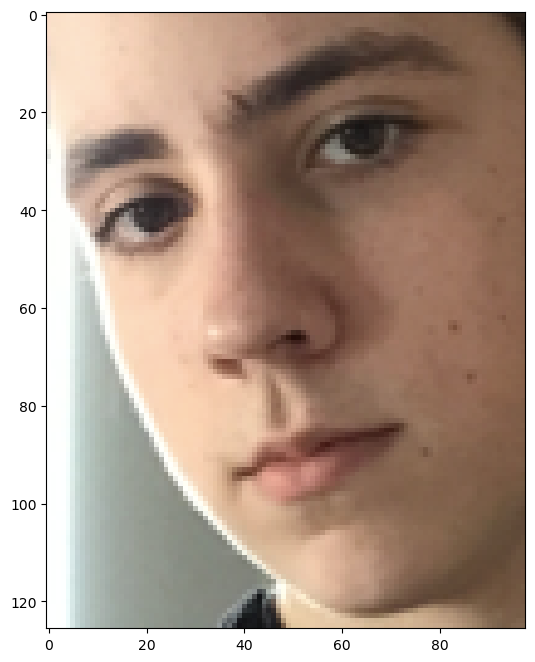

In [23]:
render_image(convert_to_RGB(cropped_299))

In [24]:
df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,62,194,160,320,without_mask,maksssksksss299,301,400,maksssksksss299.xml,maksssksksss299.png
1,43,169,149,308,without_mask,maksssksksss528,301,400,maksssksksss528.xml,maksssksksss528.png
2,48,107,218,304,mask_weared_incorrect,maksssksksss272,275,400,maksssksksss272.xml,maksssksksss272.png
3,28,78,43,99,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
4,160,66,176,83,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
5,174,33,186,52,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
6,202,40,216,59,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
7,237,41,248,58,without_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
8,249,44,266,66,mask_weared_incorrect,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
9,298,38,311,54,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png


Create new file

In [ ]:
os.makedirs("facemaskdetection")

In [27]:
# Copy The File Name (Before appending with .png extension)
df['cropped_image_file'] = df['file']
df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,62,194,160,320,without_mask,maksssksksss299,301,400,maksssksksss299.xml,maksssksksss299.png,maksssksksss299
1,43,169,149,308,without_mask,maksssksksss528,301,400,maksssksksss528.xml,maksssksksss528.png,maksssksksss528
2,48,107,218,304,mask_weared_incorrect,maksssksksss272,275,400,maksssksksss272.xml,maksssksksss272.png,maksssksksss272
3,28,78,43,99,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png,maksssksksss514
4,160,66,176,83,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png,maksssksksss514
...,...,...,...,...,...,...,...,...,...,...,...
4067,271,73,278,82,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png,maksssksksss294
4068,236,91,243,99,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png,maksssksksss294
4069,236,76,243,83,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png,maksssksksss294
4070,264,76,268,82,with_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png,maksssksksss294


In [ ]:
directory = 'cropped_images'
parent_directory = './'
path = os.path.join(parent_directory, directory)
os.mkdir(path)

In [29]:
!ls './'

Untitled.ipynb    cropped_images    facemaskdetection


In [46]:
for i in range(len(df)):
    # Get the file path and read the image
    image_filepath = './facemaskdetection/images/' + df['image_file'].iloc[i]
    image = cv2.imread(image_filepath)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not load image {image_filepath}")
        continue

    # Set the cropped image file name
    df.loc[i, 'cropped_image_file'] = df.loc[i, 'cropped_image_file'] + '-' + str(i) + '.png'
    cropped_image_filename = df.loc[i, 'cropped_image_file']

    # Get the xmin, ymin, xmax, ymax values (bounding box) to crop the image
    xmin = df['xmin'].iloc[i]
    ymin = df['ymin'].iloc[i]
    xmax = df['xmax'].iloc[i]
    ymax = df['ymax'].iloc[i]

    # Crop the image based on the values above
    cropped_image = image[ymin:ymax, xmin:xmax]

    # Save the cropped image
    cropped_image_directory = os.path.join('./cropped_images', cropped_image_filename)
    cv2.imwrite(cropped_image_directory, cropped_image)


libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
libpng warning: iCCP: Not recognizing known sRGB profile that has been edited


In [47]:
df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,62,194,160,320,without_mask,maksssksksss299,301,400,maksssksksss299.xml,maksssksksss299.png,maksssksksss299-0.png-0.png
1,43,169,149,308,without_mask,maksssksksss528,301,400,maksssksksss528.xml,maksssksksss528.png,maksssksksss528-1.png-1.png
2,48,107,218,304,mask_weared_incorrect,maksssksksss272,275,400,maksssksksss272.xml,maksssksksss272.png,maksssksksss272-2.png-2.png
3,28,78,43,99,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png,maksssksksss514-3.png-3.png
4,160,66,176,83,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png,maksssksksss514-4.png-4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,271,73,278,82,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png,maksssksksss294-4067.png-4067.png
4068,236,91,243,99,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png,maksssksksss294-4068.png-4068.png
4069,236,76,243,83,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png,maksssksksss294-4069.png-4069.png
4070,264,76,268,82,with_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png,maksssksksss294-4070.png-4070.png


In [50]:
print(len(df['cropped_image_file']))

4072


In [51]:
df['cropped_image_file'].iloc[0]

'maksssksksss299-0.png-0.png'

In [52]:
cropped_299_0_path = './cropped_images/' + df['cropped_image_file'].iloc[0]
cropped_299_0_path

'./cropped_images/maksssksksss299-0.png-0.png'

In [53]:
cropped_299_0 = cv2.imread(cropped_299_0_path)
cropped_299_0

array([[[202, 222, 250],
        [202, 223, 251],
        [200, 224, 251],
        ...,
        [ 27,  35,  47],
        [ 28,  36,  46],
        [ 29,  35,  45]],

       [[201, 222, 251],
        [201, 224, 250],
        [201, 224, 251],
        ...,
        [ 25,  35,  48],
        [ 23,  29,  40],
        [ 26,  32,  40]],

       [[202, 223, 251],
        [200, 224, 249],
        [200, 224, 250],
        ...,
        [ 36,  46,  61],
        [ 26,  33,  46],
        [ 23,  27,  37]],

       ...,

       [[255, 255, 254],
        [255, 255, 254],
        [254, 255, 254],
        ...,
        [ 71,  93, 119],
        [ 69,  91, 117],
        [ 71,  93, 119]],

       [[255, 255, 254],
        [255, 255, 254],
        [254, 255, 254],
        ...,
        [ 72,  94, 120],
        [ 76,  98, 124],
        [ 76,  98, 124]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 253],
        ...,
        [ 78, 100, 126],
        [ 80, 101, 128],
        [ 80, 103, 127]]

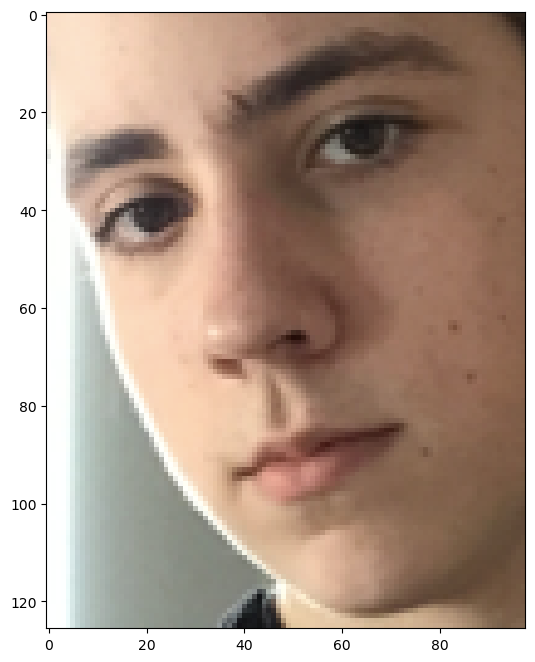

In [54]:
render_image(convert_to_RGB(cropped_299_0))

TRAIN TEST SPLIT

In [55]:
test_df = df[:800]
train_df = df[800:]

train_df.shape, test_df.shape

((3272, 11), (800, 11))

In [56]:
train_df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
800,133,47,159,76,without_mask,maksssksksss672,400,300,maksssksksss672.xml,maksssksksss672.png,maksssksksss672-800.png-800.png
801,354,266,397,300,without_mask,maksssksksss672,400,300,maksssksksss672.xml,maksssksksss672.png,maksssksksss672-801.png-801.png
802,4,83,75,161,without_mask,maksssksksss114,400,225,maksssksksss114.xml,maksssksksss114.png,maksssksksss114-802.png-802.png
803,80,58,153,141,with_mask,maksssksksss114,400,225,maksssksksss114.xml,maksssksksss114.png,maksssksksss114-803.png-803.png
804,189,30,245,88,with_mask,maksssksksss100,400,226,maksssksksss100.xml,maksssksksss100.png,maksssksksss100-804.png-804.png


In [63]:
classes = list(train_df['label'].unique())

In [102]:
train_df[train_df['file'] == 'maksssksksss7']['label'].unique()

array(['with_mask', 'without_mask'], dtype=object)

In [103]:
image_7_path = './facemaskdetection/images/maksssksksss7.png'
image_7 = cv2.imread(image_7_path)
image_7

array([[[102, 101, 103],
        [104, 102, 104],
        [105, 101, 105],
        ...,
        [176, 179, 179],
        [175, 176, 175],
        [174, 175, 173]],

       [[102, 101, 105],
        [102, 101, 105],
        [104, 101, 106],
        ...,
        [177, 182, 182],
        [167, 169, 168],
        [168, 169, 167]],

       [[ 97,  98, 103],
        [ 97,  97, 102],
        [100,  98, 103],
        ...,
        [176, 183, 187],
        [166, 171, 171],
        [169, 173, 169]],

       ...,

       [[ 41,  35,  40],
        [ 41,  34,  40],
        [ 39,  33,  39],
        ...,
        [ 53,  72,  95],
        [ 54,  73,  95],
        [ 54,  74,  95]],

       [[ 40,  35,  40],
        [ 40,  35,  40],
        [ 40,  36,  41],
        ...,
        [ 56,  75,  98],
        [ 54,  73,  96],
        [ 55,  74,  95]],

       [[ 42,  38,  43],
        [ 40,  37,  42],
        [ 41,  37,  42],
        ...,
        [ 61,  80, 103],
        [ 55,  74,  96],
        [ 54,  73,  94]]

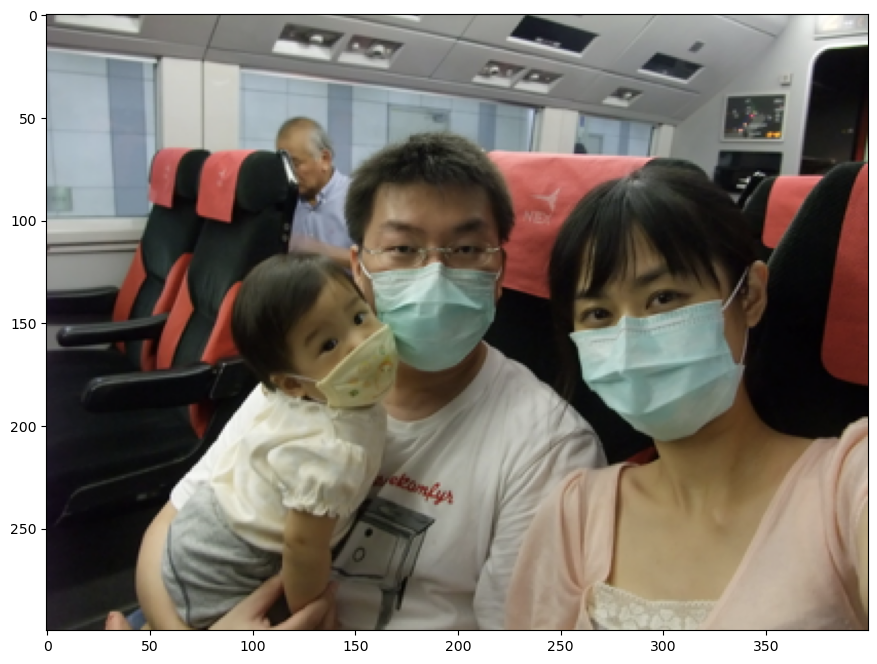

In [104]:
image_7_rgb = convert_to_RGB(image_7)
render_image(image_7_rgb)

In [105]:
image_7_df = train_df[train_df['file'] == 'maksssksksss7']
image_7_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
887,253,116,342,210,with_mask,maksssksksss7,400,300,maksssksksss7.xml,maksssksksss7.png,maksssksksss7-887.png-887.png
888,152,96,222,174,with_mask,maksssksksss7,400,300,maksssksksss7.xml,maksssksksss7.png,maksssksksss7-888.png-888.png
889,120,134,173,194,with_mask,maksssksksss7,400,300,maksssksksss7.xml,maksssksksss7.png,maksssksksss7-889.png-889.png
890,118,66,135,90,without_mask,maksssksksss7,400,300,maksssksksss7.xml,maksssksksss7.png,maksssksksss7-890.png-890.png


In [106]:
with_mask_list, without_mask_list, incorrectly_worn_list = [], [], []
for i in range(len(image_7_df)):
    bounding_box = [image_7_df['xmin'].iloc[i], image_7_df['ymin'].iloc[i],
                    image_7_df['xmax'].iloc[i], image_7_df['ymax'].iloc[i]]
    if image_7_df['label'].iloc[i] == 'with_mask':
        with_mask_list.append(bounding_box)
    elif image_7_df['label'].iloc[i] == 'without_mask':
        without_mask_list.append(bounding_box)
    else:
        incorrectly_worn_list.append(bounding_box)
        
found_objects_dict = {'With Mask': with_mask_list, 
                      'Without Mask': without_mask_list, 
                      'Incorrectly Worn': incorrectly_worn_list}
found_objects_dict

{'With Mask': [[253, 116, 342, 210],
  [152, 96, 222, 174],
  [120, 134, 173, 194]],
 'Without Mask': [[118, 66, 135, 90]],
 'Incorrectly Worn': []}

In [107]:
for key, value in found_objects_dict.items():
    for i in range(len(value)):
        color = (0, 255, 0) # green
        text = 'Mask'
        if key == 'Without Mask':
            color = (255, 0, 0) # red
            text = 'No Mask'
        elif key == 'Incorrectly Worn':
            color = (255, 255, 0) # yellow
            text = 'Incorrect'
        start_point = (value[i][0], value[i][1])
        end_point = (value[i][2], value[i][3])
        cv2.rectangle(image_7_rgb, start_point, end_point, color = color, thickness = 2)
        cv2.putText(image_7_rgb, org = (value[i][0] - 8, value[i][1] - 3), text = text, 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = color)

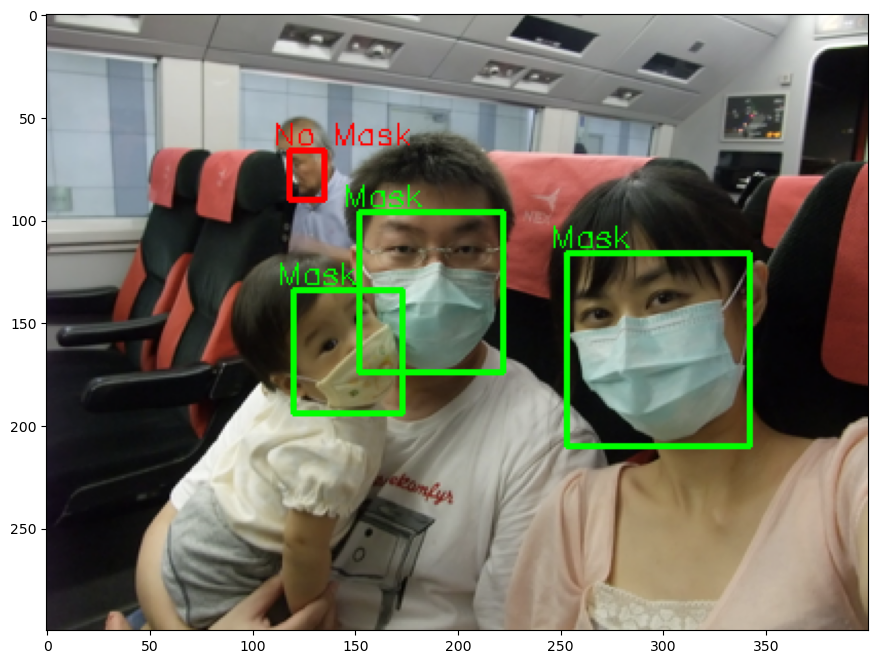

In [108]:
render_image(image_7_rgb)

In [109]:
train_df['label'].value_counts()

label
with_mask                2579
without_mask              596
mask_weared_incorrect      97
Name: count, dtype: int64

In [110]:
sorted_label_df = pd.DataFrame(train_df['label'].value_counts()).reset_index()
sorted_label_df.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sorted_label_df

,count,count
0,with_mask,2579
1,without_mask,596
2,mask_weared_incorrect,97


In [111]:
cropped_image_path = './cropped_images/' + train_df['cropped_image_file'].iloc[0]
cropped_image = cv2.imread(cropped_image_path)
cropped_image.shape

(29, 26, 3)

In [112]:
cropped_image.shape[0]

29

In [113]:
image_width = []
image_height = []
for i in range(len(train_df)):
    cropped_image_path = './cropped_images/' + train_df['cropped_image_file'].iloc[i]
    cropped_image = cv2.imread(cropped_image_path)
    image_width.append(cropped_image.shape[0])
    image_height.append(cropped_image.shape[1])

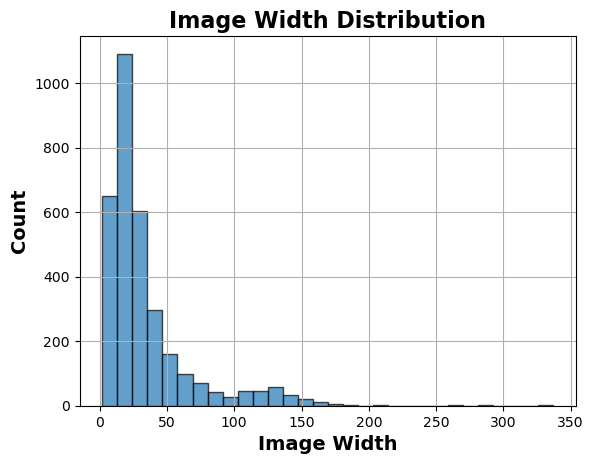

In [114]:
plt.hist(image_width, bins=30, edgecolor='black', alpha=0.7)
plt.title('Image Width Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Image Width', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.grid(True)
plt.show()

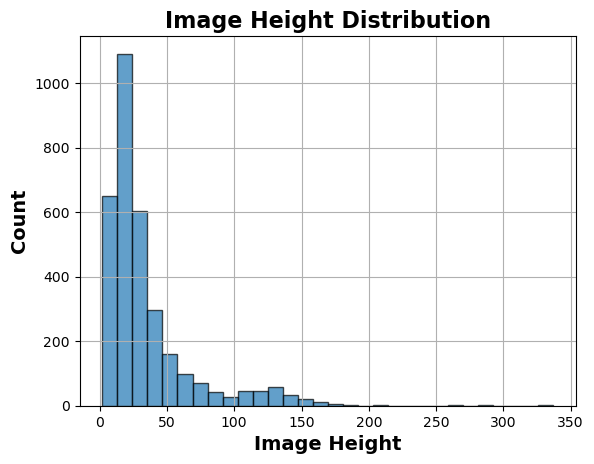

In [115]:
plt.hist(image_width, bins=30, edgecolor='black', alpha=0.7)
plt.title('Image Height Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Image Height', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.grid(True)
plt.show()

In [137]:
print('IMAGE WIDTH')
print(f'Min: {min(image_width)}')
print(f'Max: {max(image_width)}')
print(f'Mean: {np.mean(image_width)}')
print(f'Median: {np.median(image_width)}')
print('IMAGE HEIGHT')
print(f'Min: {min(image_height)}')
print(f'Max: {max(image_height)}')
print(f'Mean: {np.mean(image_height)}')
print(f'Median: {np.median(image_height)}')

IMAGE WIDTH
Min: 2
Max: 337
Mean: 34.64700488997555
Median: 23.0
IMAGE HEIGHT
Min: 1
Max: 317
Mean: 30.724938875305625
Median: 21.0


In [138]:
image_target_size = (int(np.median(image_width)), int(np.median(image_height)))
image_target_size

(23, 21)

In [118]:
conda install -c conda-forge keras-preprocessing

Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [119]:
from keras_preprocessing.image import ImageDataGenerator


In [144]:
train_image_generator = ImageDataGenerator(rescale = 1. / 255., validation_split = 0.25)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = './cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    subset = 'training',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

valid_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = './cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    subset = 'validation',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 2454 validated image filenames belonging to 3 classes.
Found 818 validated image filenames belonging to 3 classes.


In [145]:
test_image_generator = ImageDataGenerator(rescale = 1. / 255.)

test_generator = train_image_generator.flow_from_dataframe(
    dataframe = test_df,
    directory = './cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 800 validated image filenames belonging to 3 classes.


In [146]:
print(train_generator)
print(valid_generator)
print(test_generator)

In [147]:
from tensorflow import keras
import tensorflow as tf

In [148]:
input_shape = [int(np.median(image_width)), int(np.median(image_height)), 3]

In [149]:
print(input_shape)

[23, 21, 3]


In [152]:
from tensorflow.keras.layers import Input

model = keras.models.Sequential([
    Input(shape=input_shape),
    keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=len(classes), activation='softmax')
])


In [153]:
print("Model input shape:", model.input_shape)


Model input shape: (None, 23, 21, 3)


In [169]:
model.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])

steps_per_epoch = len(train_generator) // train_generator.batch_size
validation_steps = len(valid_generator) // valid_generator.batch_size

valid_1 = model.fit(train_generator, 
                 epochs=10, 
                 steps_per_epoch=steps_per_epoch, 
                 validation_data=valid_generator, 
                 validation_steps=validation_steps)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.8542 - loss: 0.4960 - recall_9: 0.8542 - val_accuracy: 0.8068 - val_loss: 0.5602 - val_recall_9: 0.8020
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.8131 - loss: 0.5163 - recall_9: 0.8131 - val_accuracy: 0.8068 - val_loss: 0.5542 - val_recall_9: 0.8032
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.8125 - loss: 0.5832 - recall_9: 0.8021 - val_accuracy: 0.8068 - val_loss: 0.5480 - val_recall_9: 0.8032
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.7708 - loss: 0.6342 - recall_9: 0.7708 - val_accuracy: 0.8068 - val_loss: 0.5388 - val_recall_9: 0.8032
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.7917 - loss: 0.5376 - recall_9: 0.7917 - val_accuracy: 0.8068 - val_loss: 0.5298 - val_recall_9: 0.8032
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.8021 - loss: 0.5235 - recall_9: 0.8021 - val_accuracy: 0.8068 - val_loss: 0.5200 - val_recall_9:

In [170]:
result_1 = pd.DataFrame(valid.history)
result_1

,accuracy,loss,recall_3,val_accuracy,val_loss,val_recall_3
0,0.781250,1.083753,0.000000,0.806846,1.061927,0.000000
1,0.718750,1.065252,0.000000,0.806846,1.032248,0.000000
2,0.812500,1.022448,0.000000,0.806846,0.996616,0.000000
3,0.765625,0.995204,0.000000,0.806846,0.952061,0.000000
4,0.734375,0.964204,0.000000,0.806846,0.898289,0.003667
5,0.734375,0.924537,0.000000,0.806846,0.835304,0.327628
6,0.765625,0.858219,0.296875,0.806846,0.763990,0.636919
7,0.718750,0.803775,0.531250,0.806846,0.689918,0.723716
8,0.750000,0.718342,0.718750,0.806846,0.623590,0.776284
9,0.859375,0.543041,0.843750,0.806846,0.576809,0.798289


<Axes: >

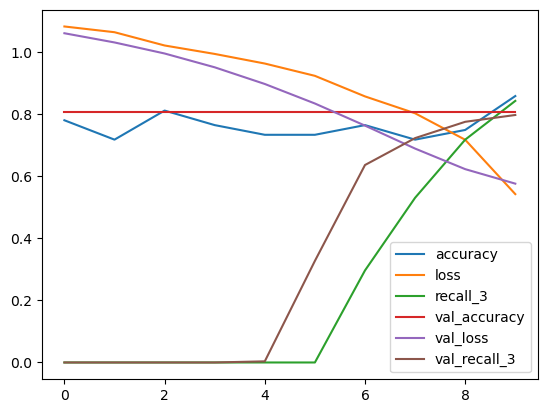

In [171]:
result_1.plot()

In [172]:
def plot_line(result, ax, col, title, train_column, valid_column):
    ax[col].plot(result[train_column])
    ax[col].plot(result[valid_column])
    ax[col].set_title(title, fontweight = 'bold')
    ax[col].legend(['Train', 'Validation'])
    
def plot_result(result, train_recall, valid_recall):
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 8))
    fig.suptitle('Model Performance', fontsize = 20, fontweight = 'bold')
    
    plot_line(result, ax, 0, 'Accuracy', 'accuracy', 'val_accuracy')
    plot_line(result, ax, 1, 'Recall', train_recall, valid_recall)
    plot_line(result, ax, 2, 'Loss', 'loss', 'val_loss')
    plt.show()

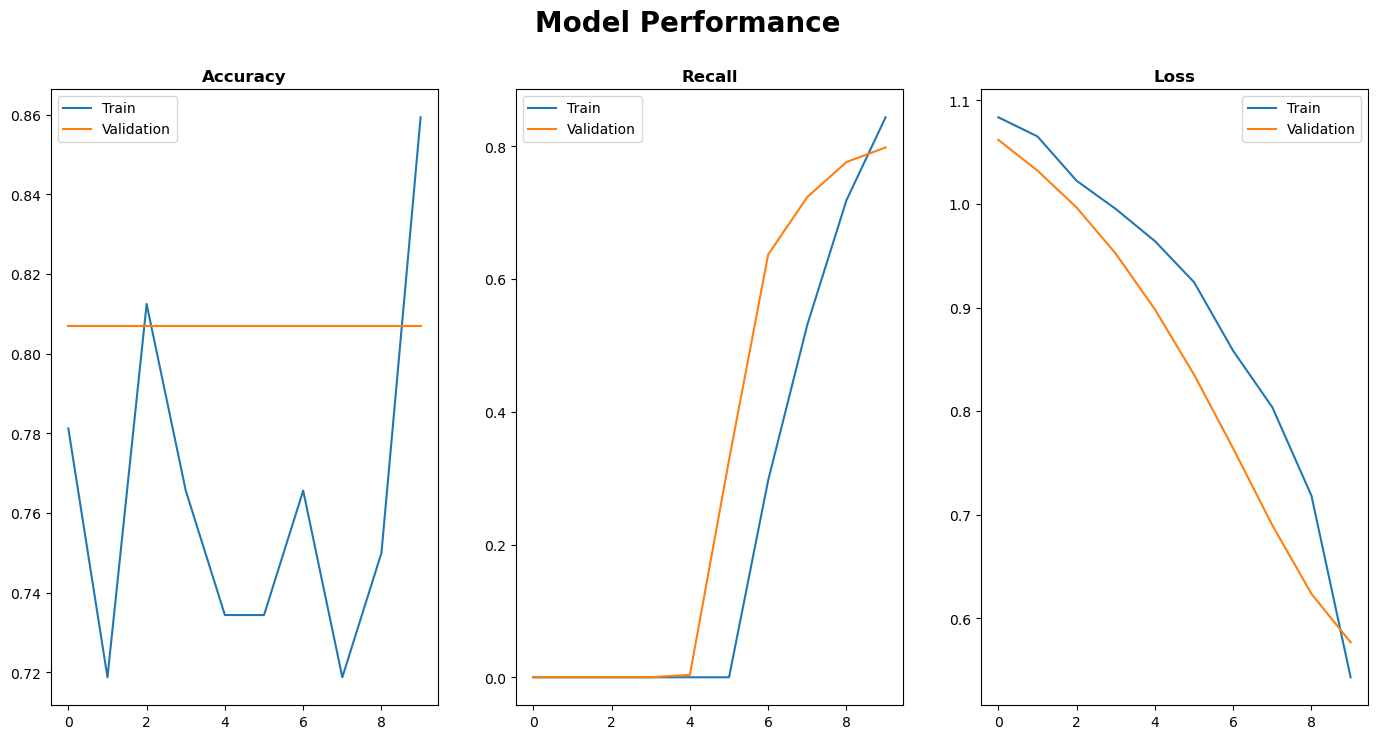

In [173]:
plot_result(result_1, 'recall_3', 'val_recall_3')